# Ensemble: Bagging (Bootstrap Aggregation)

- 다양한 모델을 결합하여 예측 성능을 향상시키는 방법
    - Bootstrap 방식의 샘플링: 각 estimator 마다 훈련 데이터를 뽑을 때, 중복 값을 혀용하는 방식
    - 분류 모델의 경우, 각 tree(estimator)의 예측값을 다수결(hard voting) 결정
    - 회귀 모델의 경우, 각 tree(estimator)의 예측값을 평균내어 결정
    - 기본적으로 100개의 tree 사용

**하이퍼 파라미터**
| **하이퍼파라미터**      | **설명**                                                                                     | **기본값**      |
|--------------------------|--------------------------------------------------------------------------------------------|-----------------|
| `n_estimators`           | 생성할 트리의 개수 지정 (트리의 개수가 많을수록 성능이 좋아질 수 있지만 계산 비용 증가) | 100             |
| `criterion`              | 분할 품질을 측정하는 기준 (분류에서는 "gini" 또는 "entropy"를 사용)                 | "gini"          |
| `max_depth`              | 각 트리의 최대 깊이 (설정하지 않으면 트리는 잎 노드가 순수해질 때까지 계속 확장) | None            |
| `min_samples_split`      | 내부 노드를 분할하기 위해 필요한 최소 샘플 수 (과적합 방지 목적)                   | 2               |
| `min_samples_leaf`       | 잎 노드가 되기 위해 필요한 최소 샘플 수 (과적합 방지 목적)                          | 1               |
| `max_features`           | 각 트리를 분할할 때 고려할 최대 특성 수 ()"auto", "sqrt", "log2" 중 선택하거나, 특정 숫자 지정 가능) | "auto"          |
| `bootstrap`              | 각 트리를 만들 때 부트스트랩 샘플링을 사용할지 여부를 결정                               | True            |
| `random_state`           | 결과의 재현성을 위해 난수 시드 고정                                                  | None            |
| `n_jobs`                 | 병렬 계산을 위해 사용할 CPU 코어 수를 지정 (-1로 설정하면 모든 코어를 사용)           | None            |
| `class_weight`           | 각 클래스의 가중치를 자동으로 계산하거나 직접 지정 가능 (불균형 데이터 처리에 유용)    | None            |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [2]:
# 위스콘신 유방암 데이터 로드
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# 학습-평가 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0)
X_train.shape, y_train.shape

((426, 30), (426,))

## Random Forest
여러 개의 결정 트리를 생성하여 평균(또는 다수결)으로 결과를 도출하는 앙상블 학습 방법이다. 

In [4]:
# RandomForest 사용
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=101, # 101개의 decision tree
    max_depth=7, # 각 tree max depth=7
    random_state=0
)

rf_clf.fit(X_train, y_train)
print(f"Train score: {rf_clf.score(X_train, y_train)}")
print(f"Test score: {rf_clf.score(X_test, y_test)}")


Train score: 0.9976525821596244
Test score: 0.9790209790209791


In [7]:
# 101개의 DecisionTree 확인
#print(rf_clf.estimators_) 

# 101개의 DecisionTree가 사용한 sample 확인
#print(rf_clf.estimators_samples_) 

for i, sample_idxs in enumerate(rf_clf.estimators_samples_):
    print(f"{i}번째 DeicisionTree의 샘플 인덱스: {sorted(sample_idxs)}")

0번째 DeicisionTree의 샘플 인덱스: [np.int32(0), np.int32(0), np.int32(1), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(12), np.int32(12), np.int32(13), np.int32(16), np.int32(16), np.int32(16), np.int32(20), np.int32(22), np.int32(22), np.int32(24), np.int32(25), np.int32(25), np.int32(26), np.int32(31), np.int32(32), np.int32(32), np.int32(32), np.int32(35), np.int32(36), np.int32(36), np.int32(36), np.int32(38), np.int32(38), np.int32(40), np.int32(41), np.int32(41), np.int32(44), np.int32(45), np.int32(49), np.int32(49), np.int32(49), np.int32(53), np.int32(53), np.int32(55), np.int32(56), np.int32(56), np.int32(56), np.int32(57), np.int32(57), np.int32(57), np.int32(57), np.int32(59), np.int32(59), np.int32(60), np.int32(60), np.int32(62), np.int32(63), np.int32(63), np.int32(64), np.int32(65), np.int32(65), np.int32(66), np.int32(66), np.int32(66), np.int32(71), np.int32(72), np.int32(73), np.int32(75), np.int32(76), np.int32(77), np

In [9]:
# 특성 중요도 확인
feat_imptc_ser = pd.Series(rf_clf.feature_importances_, index=data.feature_names).sort_values(ascending=False)
feat_imptc_ser

worst perimeter            0.162959
worst radius               0.116312
worst concave points       0.113276
mean concave points        0.109122
worst area                 0.061360
mean concavity             0.055477
mean perimeter             0.053938
mean area                  0.048122
worst concavity            0.037659
area error                 0.033015
radius error               0.029128
mean radius                0.024138
mean texture               0.015852
worst texture              0.014613
perimeter error            0.014427
worst smoothness           0.013655
worst compactness          0.012321
worst symmetry             0.012223
worst fractal dimension    0.009629
mean compactness           0.008857
mean smoothness            0.007069
texture error              0.006663
concave points error       0.006617
mean symmetry              0.006303
concavity error            0.006120
symmetry error             0.004555
fractal dimension error    0.004544
compactness error          0

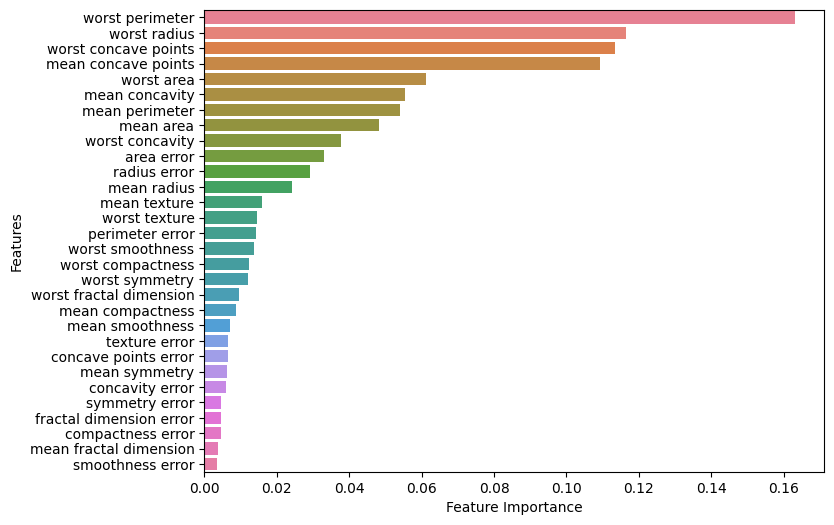

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(
    x=feat_imptc_ser,
    y=feat_imptc_ser.index,
    hue=feat_imptc_ser.index
)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

## 와인데이터셋 이진 분류 [실습 1]

In [25]:
import numpy as np
import pandas as pd

# 1. 데이터 로드
wine_df = pd.read_csv('./data/wine_simple.csv')
wine_df.head(2)

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0


In [8]:
from sklearn.model_selection import train_test_split

X = wine_df.drop('class', axis=1)
y = wine_df['class']

# 2. 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier
# 3. RandomForestClassifier 모델 생성과 학습
rf_clf = RandomForestClassifier(
    n_estimators=170,
    max_depth=7,
    random_state=42
)

rf_clf.fit(X_train, y_train)

,n_estimators,170
,criterion,'gini'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# 4. 예측

In [22]:
# 5. 정확도 출력 
print(f"Train score: {rf_clf.score(X_train, y_train)}")
print(f"Test score: {rf_clf.score(X_test, y_test)}")

Train score: 0.889367816091954
Test score: 0.8492307692307692


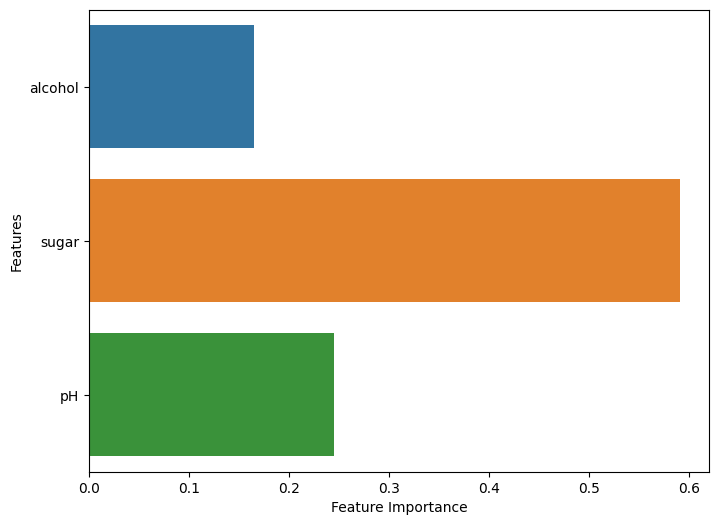

In [ ]:
# 6. 특성 중요도 확인 (시각화)
import matplotlib.pyplot as plt
import seaborn as sns
 
feature_importance_series = pd.Series(rf_clf.feature_importances_, index=X.columns)

plt.figure(figsize=(8,6))
sns.barplot(
    x=feature_importance_series,
    y=feature_importance_series.index,
    hue=feature_importance_series.index
)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

## 인간행동인식 다중분류 [실습 2]

https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones


사용자 행동 target class
- WALKING
- WALKING_UPSTAIRS
- WALKING_DOWNSTAIRS
- SITTING
- STANDING
- LAYING

**HAR 특성 설명**

| **특성 유형**             | **설명**                                                                                                                                     |
|--------------------------|--------------------------------------------------------------------------------------------------------------------------------------------|
| **Mean와 Std**            | 'tBodyAcc-mean()-X', 'tBodyAcc-std()-Y'와 같은 특성은 시간 도메인에서의 신체 가속도에 대한 평균 및 표준편차 값 ('X', 'Y', 'Z'는 축을 의미) |
| **주파수 도메인 특징**     | 이름에 'f'로 시작하는 특성은 주파수 도메인에서 계산된 값 (예를 들어 'fBodyAcc-meanFreq()-X'는 신체 가속도 센서의 X축에서의 평균 주파수 값)    |
| **가속도와 자이로스코프 데이터** | 'tBodyAcc', 'tGravityAcc', 'tBodyGyro' 등의 특성은 신체 가속도, 중력 가속도, 자이로스코프 데이터                                                  |
| **Jerk 신호**             | 'tBodyAccJerk-mean()-X'와 같은 특성은 가속도의 변화율 (활동 간의 차이를 분류하는 데 중요한 역할)                                          |
| **Magnitude(크기)**       | 'tBodyAccMag-mean()', 'tGravityAccMag-std()'와 같은 특성은 특정 축 방향의 가속도 또는 자이로스코프 값을 합친 크기                                             |
| **FFT 변환 기반 특징**    | 주파수 도메인에서의 데이터 특성들은 Fourier 변환을 통해 얻어짐 (예를 들어, 'fBodyAccMag-mean()'은 주파수 도메인에서 가속도의 크기의 평균값)                  |
| **Angle(각도)**           | 'angle(X,gravityMean)'과 같은 특성은 특정 축과 중력 벡터 간의 각도 (중력과의 상대적인 위치 나타냄)                                                    |
| **레이블**                | 'Activity' 컬럼에는 각 행의 활동 레이블이 포함 (걷기, 계단 오르기, 계단 내리기, 앉기, 서기, 눕기 등의 활동 종류 있음)                                          |


In [ ]:
import numpy as np
import pandas as pd

In [14]:
# 1. 데이터 로드
har_train_df = pd.read_csv('./data/har_train.csv')
har_test_df = pd.read_csv('./data/har_test.csv')
display(har_train_df.head(2))
display(har_train_df.describe())

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [ ]:
# 2. 데이터 분리 (Only require feature-target split)
X_train = har_train_df.drop('Activity', axis=1)
y_train = har_train_df['Activity']
X_test =  har_test_df.drop('Activity', axis=1)
y_test = har_test_df['Activity']

#X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7352, 562), (2947, 562), (7352,), (2947,))

In [ ]:
# 3. 레이블 인코딩 (Activity를 숫자로 변환)
from sklearn.preprocessing import LabelEncoder

activities = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']

label_encoder = LabelEncoder()
label_encoder.fit(activities) # 중복값 제거, 오름차순 정렬 > 적절한 숫자 (인덱스 번호)
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

(7352, 7352)

In [19]:
# 4. 데이터 정규화
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

In [34]:
# 5. RandomForestClassifier 모델 학습
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,
    random_state=0
)

rf_clf.fit(X_train_scaled, y_train_encoded)

RandomForestClassifier(max_depth=8, random_state=0)

In [35]:
# 6. 모델 예측
print(rf_clf.predict(X_test_scaled[:20]))
print(y_test_encoded[:20])

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [36]:
# 7. 평가 (정확도) 
rf_clf.score(X_train_scaled, y_train_encoded), rf_clf.score(X_test_scaled, y_test_encoded)

(0.9873503808487486, 0.9168646080760094)

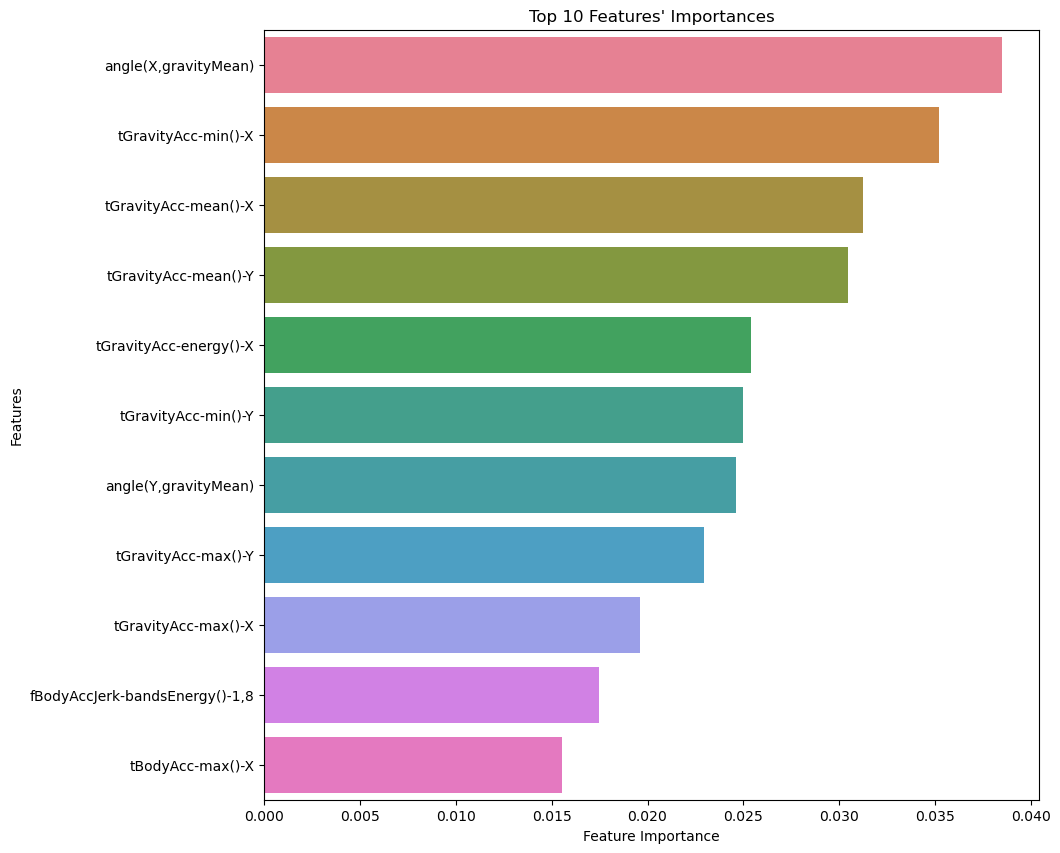

In [44]:
# 8. 중요도 상위 20개의 특성 시각화
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

top_10_features = feature_importances[:11]

plt.figure(figsize=(10,10))
sns.barplot(
    x= top_10_features,
    y= top_10_features.index,
    hue= top_10_features.index
)

plt.title("Top 10 Features' Importances")
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
# One hot encoding